In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
import pandas as pd

#finite schrodinger's equation in matrix form, with boundary conditions given below

$$ \begin{bmatrix}\frac{1}{\Delta y^2}+mL^2V_1 & -\frac{1}{2 \Delta y^2} &   0 & 0...\\ -\frac{1}{2 \Delta y^2} & \frac{1}{\Delta y^2}+mL^2V_2 & -\frac{1}{2 \Delta y^2} & 0... \\ ...& ... & ... & -\frac{1}{2 \Delta y^2}\\... 0 & 0 & -\frac{1}{2 \Delta y^2} & \frac{1}{\Delta y^2}+mL^2V_{N-1} \\ \end{bmatrix} \begin{bmatrix} \psi_1 \\ \psi_2 \\ ... \\ \psi_{N-1} \end{bmatrix} = mL^2 E \begin{bmatrix} \psi_1 \\ \psi_2 \\ ... \\ \psi_{N-1} \end{bmatrix} 
\\ 
\\
\\
\\ \psi_0 = \psi_N = 0 $$


We define a new variable y = x/L so that the matrix elements are dimensionless.
Defining $N$ and $dy$

In [2]:
N = 1001
dy = 1/N
y = np.linspace(-6, 6, N+1)      #N+1 accounts for \psi_0 and V_0

Any (!) potential can be passed as a function $mL^2V$

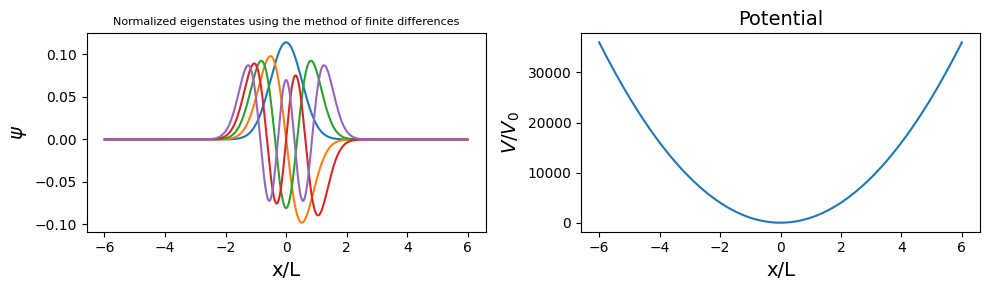

In [3]:
def mL2V(y):
  return 1000*(y)**2      #n entendi direito esse fator 1000
  #return 1000*np.sin(y)*y**2
  #return -1/(y-0.001)

V = mL2V(y)
#diagonal matrix defined as the trace of the Hamiltonian tridiagonal matrix, d = Tr(H):
diag = 1/dy**2 + mL2V(y)[1:-1]     
#second diagonal for the kinetic energy:
off_diag = -1/(2*dy**2)*np.ones(len(diag)- 1)    
#eigenfunctions eign and eigenvalues w:
w, eign = eigh_tridiagonal(diag, off_diag)
fig, axes = plt.subplots(ncols=2, figsize=(10, 3), dpi=100)
for i in range(0,5):
  axes[0].plot(y[1:-1],eign.T[i])
axes[0].set_title("Normalized eigenstates using the method of finite differences", fontsize=8)
axes[0].set_xlabel("x/L", fontsize=14), axes[0].set_ylabel("$\psi$", fontsize=14)
axes[1].plot(y, V)
axes[1].set_title("Potential", fontsize=14), axes[1].set_xlabel("x/L", fontsize=14), axes[1].set_ylabel("$V/V_0$", fontsize=14)
plt.tight_layout()

#a matriz hamiltoniana é uma matriz tridiagonal

In [13]:
z = np.argsort(w)
z = z[0:4]
energies=(w[z]/w[z][0])
pd.set_option('display.colheader_justify', 'center')
energy_df = pd.DataFrame(energies)
exact_energies = [1,3,5,7]
energy_df.columns = ["Numerical Energies (in units of E_0)"]
energy_df["Exact Energies (in units of E_0)"] = exact_energies
energy_df


,Numerical Energies (in units of E_0),Exact Energies (in units of E_0)
0,1.000000,1
1,2.999933,3
2,4.999732,5
3,6.999397,7
